In [1]:
import pandas as pd
import numpy as np
import random
from collections import deque

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import datetime as dt
import pandas as pd
import math
import plotly.express as px

def train_validation_test_split(filename ='./pricedata.csv'):
    df = pd.read_csv(filename) # Import the stock data
    df = df.dropna() # Remove missing values
    df['Date'] = pd.to_datetime(df['Date']) # Convert "Date" to datetime object.
    df.sort_values('Date', ascending=True, inplace=True) # Sort the "Date" Column by the values.
    df.set_index('Date', inplace=True) # Set the DataFrame index using "Date" Column.
    
    # Train data = 70%, Validation data = 20%, Test data = 10%  
    train_range = math.floor(len(df.index)*.7)
    val_range = math.floor(len(df.index)*.2)
    test_range = math.floor(len(df.index)*.1)
    
    # Train DataFrame
    train_df = df[:train_range].sort_index()

    # Validation DataFrame
    val_df = df[train_range:train_range + val_range].sort_index()

    # Test DataFrame
    test_df = df[(train_range + val_range):(train_range + val_range + test_range)].sort_index()
    
    # Data Split Summary
    
    data_summary = pd.DataFrame()

    data_summary['Data'] = ['Stock','Training','Validation','Testing']
    
    data_summary['From'] = [df.index.min(),
                   train_df.index.min(),
                   val_df.index.min(),
                   test_df.index.min()] 

    data_summary['To'] = [df.index.max(),
                   train_df.index.max(),
                   val_df.index.max(),
                   test_df.index.max()] 

    data_summary['Data points'] = [len(df.index), train_range, val_range, test_range]
    
    # Plot summary
    
    fig = px.timeline(data_summary, x_start="From", x_end="To", y="Data", color="Data", text="Data points")
    fig.update_layout(title='Stock Data Split Summary',
                      xaxis=dict(title='Date Range',
                                 tickfont_size=12),
                      yaxis=dict(title='Data',
                                 titlefont_size=14,
                                 tickfont_size=12),
                      xaxis_rangeslider_visible=False,
                      width=1000,height=300, margin=dict(l=100, r=50, b=100, t=100, pad=4),
                      template='none')
    fig.show()
    
    return(df, train_df, val_df, test_df, data_summary)

In [3]:
df, train_df, val_df, test_df, data_summary = train_validation_test_split('C:\Soumen\AIML\MSc\StockProject\datasets\stock_price\KAJARIACER.csv')

In [4]:
data_summary

Data       From         To  Data points
0       Stock 2010-01-04 2019-12-30         2460
1    Training 2010-01-04 2016-12-27         1722
2  Validation 2016-12-28 2018-12-21          492
3     Testing 2018-12-24 2019-12-30          246

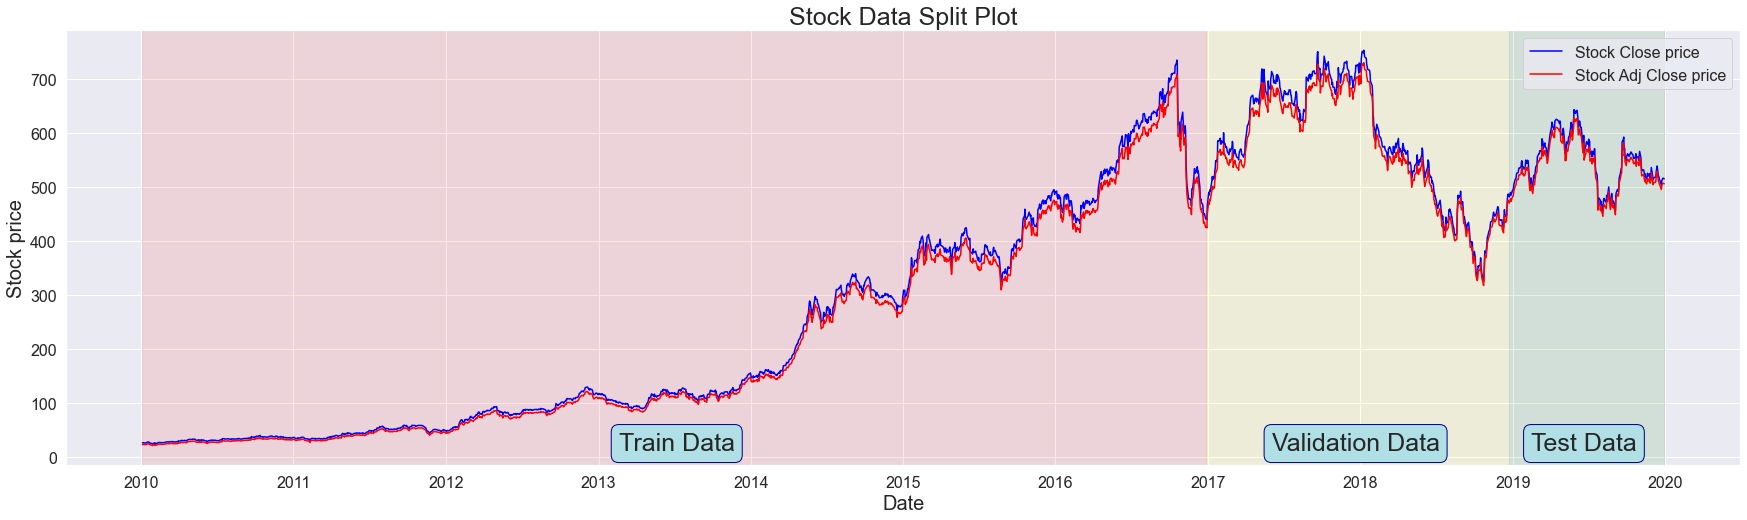

In [5]:
plt.rcParams['figure.figsize'] = (30,8)
plt.rcParams['axes.grid'] = True
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('legend',fontsize=16)

## Plot the closing price
plt.title('Stock Data Split Plot', fontsize=25)
plt.xlabel("Date", fontsize=20)
plt.ylabel("Stock price", fontsize=20)

plt.axvspan(train_df.index.min(), train_df.index.max(), alpha=0.1, color='red')
plt.annotate(f'Train Data', xy=(0.33, 0.05), xycoords='axes fraction', fontsize=25,
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

plt.axvspan(val_df.index.min(), val_df.index.max(), alpha=0.1, color='yellow')
plt.annotate(f'Validation Data', xy=(0.72, 0.05), xycoords='axes fraction', fontsize=25,
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})


plt.axvspan(test_df.index.min(), test_df.index.max(), alpha=0.1, color='green')
plt.annotate(f'Test Data', xy=(0.875, 0.05), xycoords='axes fraction', fontsize=25,
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

plt.plot(df.Close, label='Stock Close price', color='blue')
plt.plot(df['Adj Close'], label='Stock Adj Close price', color='red')
plt.legend(loc='best')
plt.show()

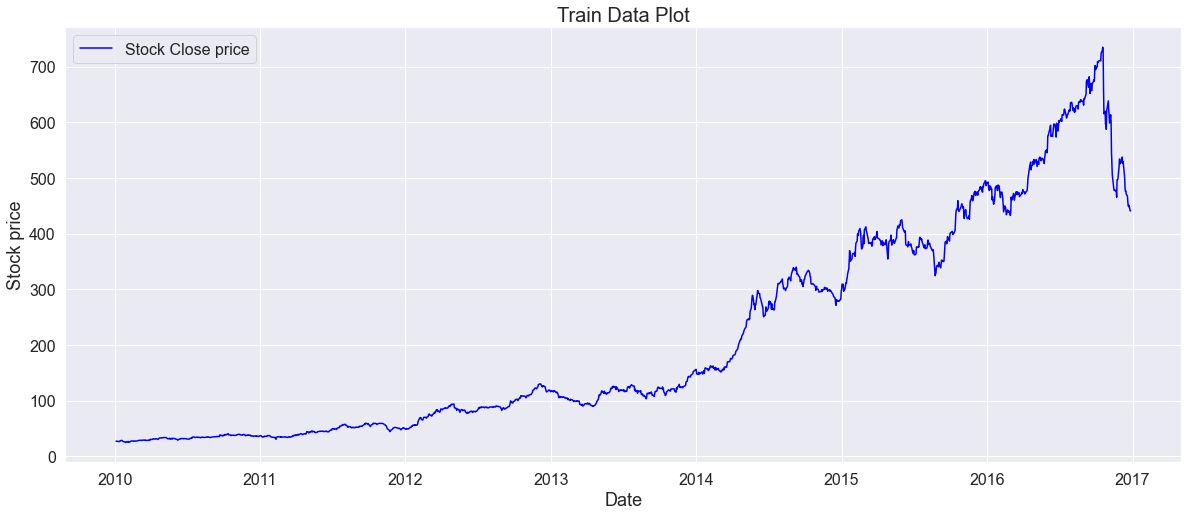

In [6]:
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['axes.grid'] = True
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('legend',fontsize=16)

## Plot the closing price
plt.title('Train Data Plot', fontsize=20)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Stock price", fontsize=18)

plt.plot(train_df.Close, color='blue', label='Stock Close price')

plt.legend(loc='best')
plt.show()

### Checking Stationarity with rolling mean and standard deviation

In [7]:
#Determine rolling statistics
rolmean = train_df['Close'].rolling(window=20).mean()
rolstd = train_df['Close'].rolling(window=20).std()
# print(rolmean, rolstd)

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

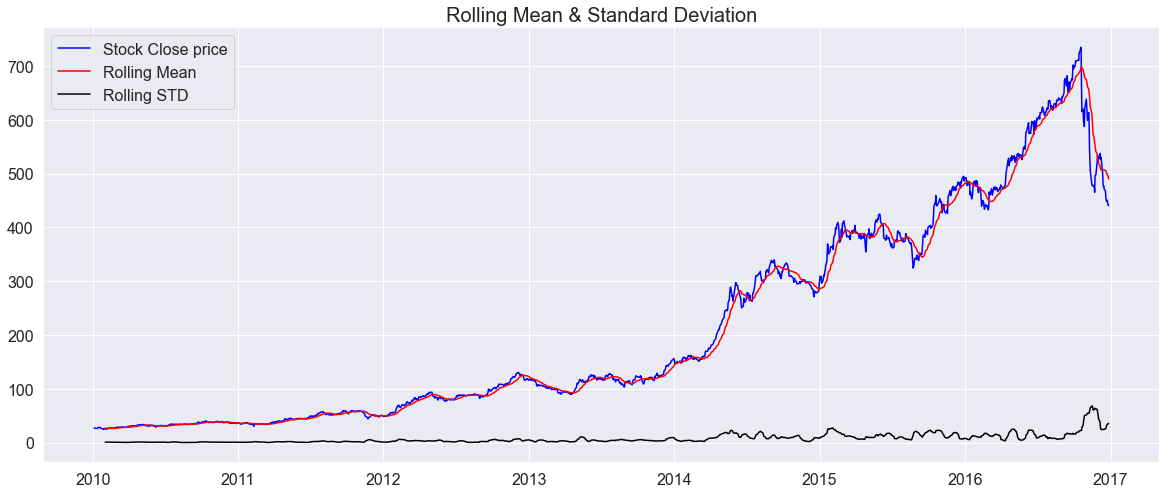

In [8]:
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['axes.grid'] = True
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rc('legend',fontsize=16)

# plt.figure(figsize=(20, 8))
# Plot rolling statistics
orig = plt.plot(train_df.Close, color='blue', label='Stock Close price')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling STD')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation', fontsize=20)

### Wrapping visual and statistical tool in a single function

In [9]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, rolling_window=12):
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=rolling_window).mean()
    rolSTD = timeseries.rolling(window=rolling_window).std()
    
    # Plot rolling statistics
    plt.rcParams['figure.figsize'] = (20,8)
    plt.rcParams['axes.grid'] = True
    plt.rc('xtick', labelsize=16) 
    plt.rc('ytick', labelsize=16) 
    plt.rc('legend',fontsize=16)
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(rolSTD, color='black', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation', fontsize=20)
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    #from statsmodels.tsa.stattools import adfuller
    
    print ('='*29)
    print ('Results of Dicky-Fuller Test:')
    print ('='*29)
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)

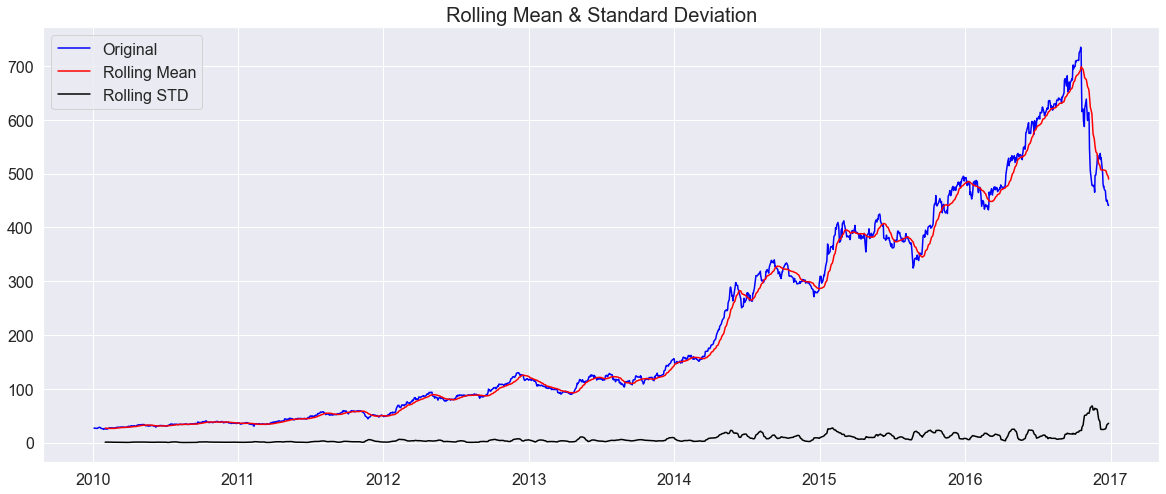

Results of Dicky-Fuller Test:
Test Statistic                   -0.773869
p-value                           0.826678
#Lags Used                       25.000000
Number of Observations Used    1696.000000
Critical Value (1%)              -3.434212
Critical Value (5%)              -2.863246
Critical Value (10%)             -2.567678
dtype: float64


In [10]:
test_stationarity(train_df.Close, rolling_window=20)

### Converting Non-Stationary data to Stationary dataset:

#### 0. Simple Differencing

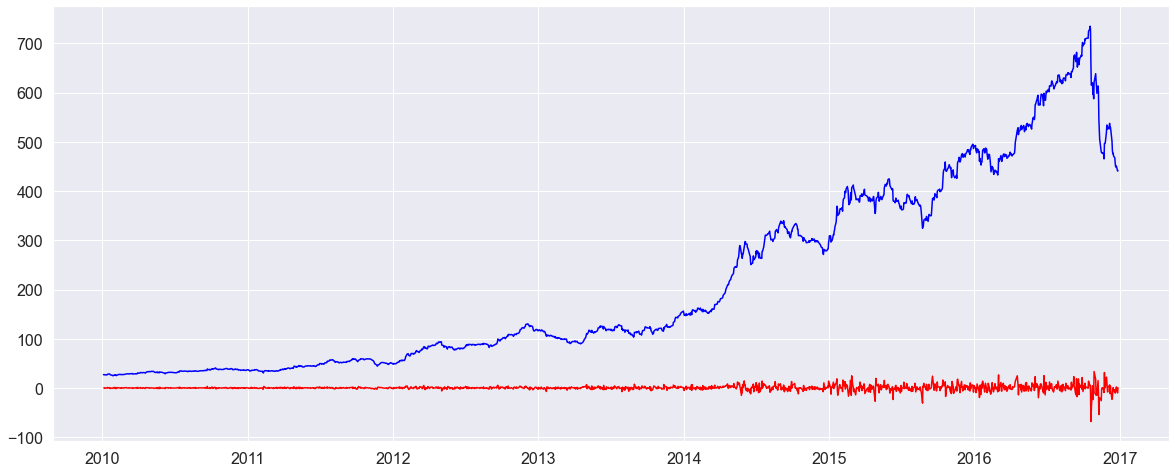

In [11]:
simpleDiff = pd.DataFrame(train_df.Close - train_df.Close.shift())
plt.figure(figsize=(20, 8))
plt.plot(train_df.Close, color='blue')
plt.plot(simpleDiff, color='red')
plt.show()

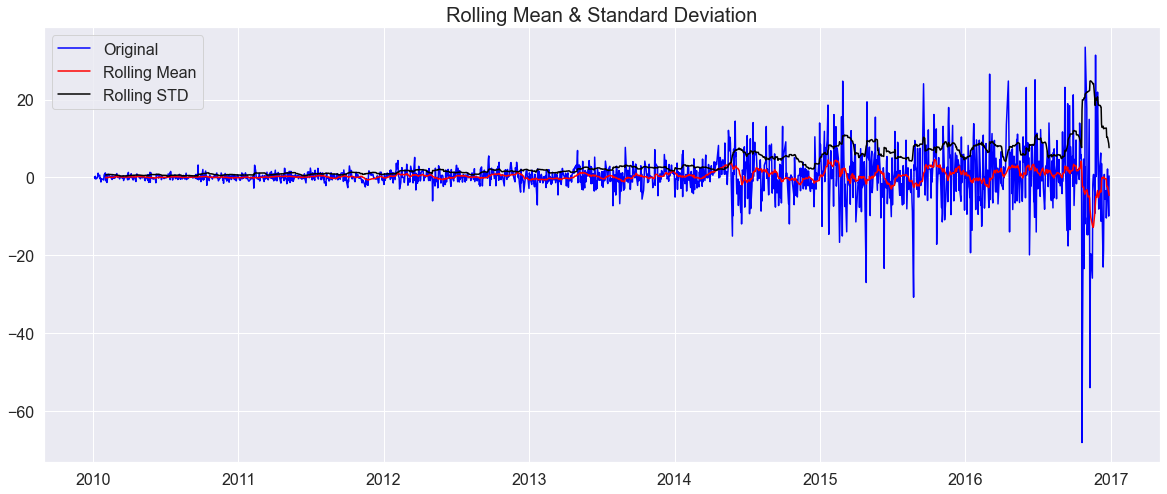

Results of Dicky-Fuller Test:
Test Statistic                -6.952118e+00
p-value                        9.633017e-10
#Lags Used                     2.400000e+01
Number of Observations Used    1.696000e+03
Critical Value (1%)           -3.434212e+00
Critical Value (5%)           -2.863246e+00
Critical Value (10%)          -2.567678e+00
dtype: float64


In [12]:
simpleDiff.dropna(inplace=True)
test_stationarity(simpleDiff, rolling_window=20)

#### 1. Log

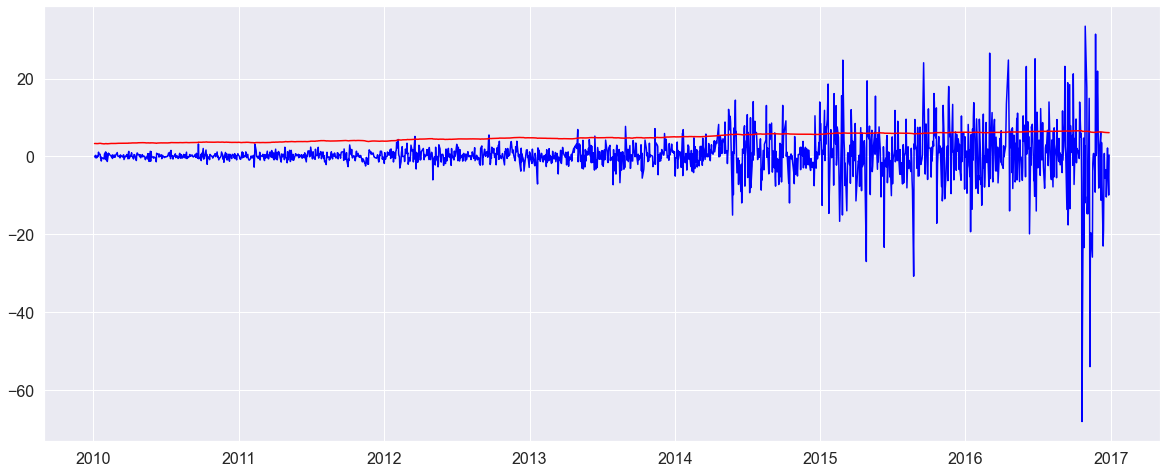

In [13]:
logScale = pd.DataFrame(np.log(train_df.Close))
plt.figure(figsize=(20, 8))
plt.plot(simpleDiff, color='blue')
plt.plot(logScale, color='red')
plt.show()

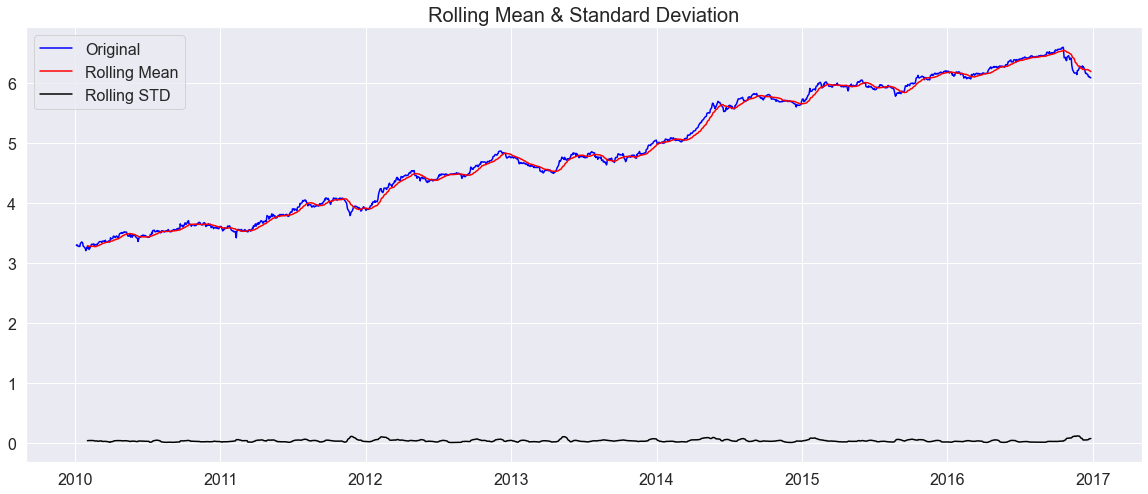

Results of Dicky-Fuller Test:
Test Statistic                   -1.072592
p-value                           0.725877
#Lags Used                        2.000000
Number of Observations Used    1719.000000
Critical Value (1%)              -3.434160
Critical Value (5%)              -2.863223
Critical Value (10%)             -2.567666
dtype: float64


In [14]:
test_stationarity(logScale, rolling_window=20)

#### 2. Differecing Simple Moving Average

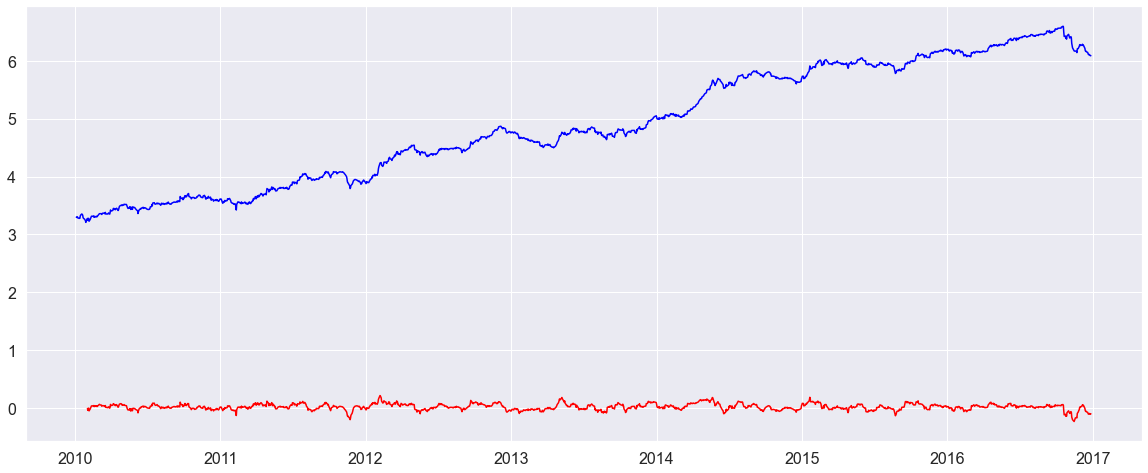

In [15]:
movingAverage = logScale.rolling(window=20).mean()
logScaleMinusMovingAverage = logScale - movingAverage

#Remove NAN Values
logScaleMinusMovingAverage.dropna(inplace=True)
# logScaleMinusMovingAverage.head(10)

plt.figure(figsize=(20, 8))
plt.plot(logScale, color='blue')
plt.plot(logScaleMinusMovingAverage, color='red')
plt.show()

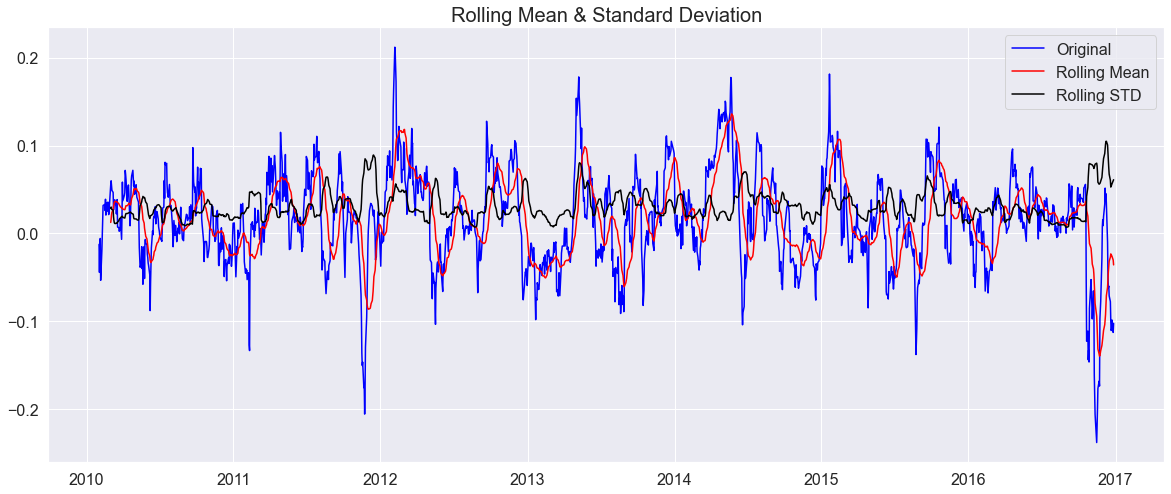

Results of Dicky-Fuller Test:
Test Statistic                -8.015372e+00
p-value                        2.146006e-12
#Lags Used                     2.000000e+00
Number of Observations Used    1.700000e+03
Critical Value (1%)           -3.434202e+00
Critical Value (5%)           -2.863242e+00
Critical Value (10%)          -2.567676e+00
dtype: float64


In [16]:
test_stationarity(logScaleMinusMovingAverage, rolling_window=20)

#### 3. Differecing Exponential Moving Average

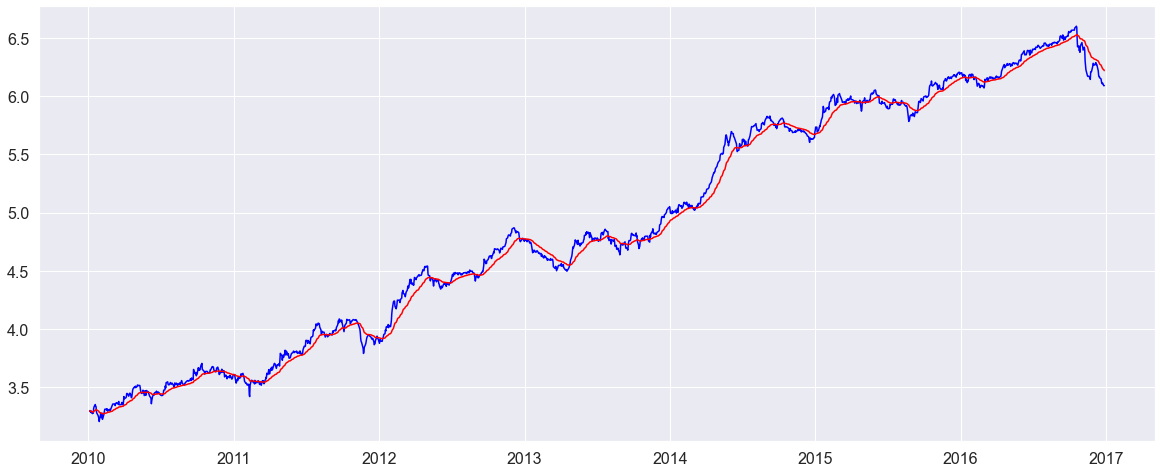

In [17]:
exponentialDecayWeightedAverage = logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(logScale, color='blue')
plt.plot(exponentialDecayWeightedAverage, color='red')
plt.show()

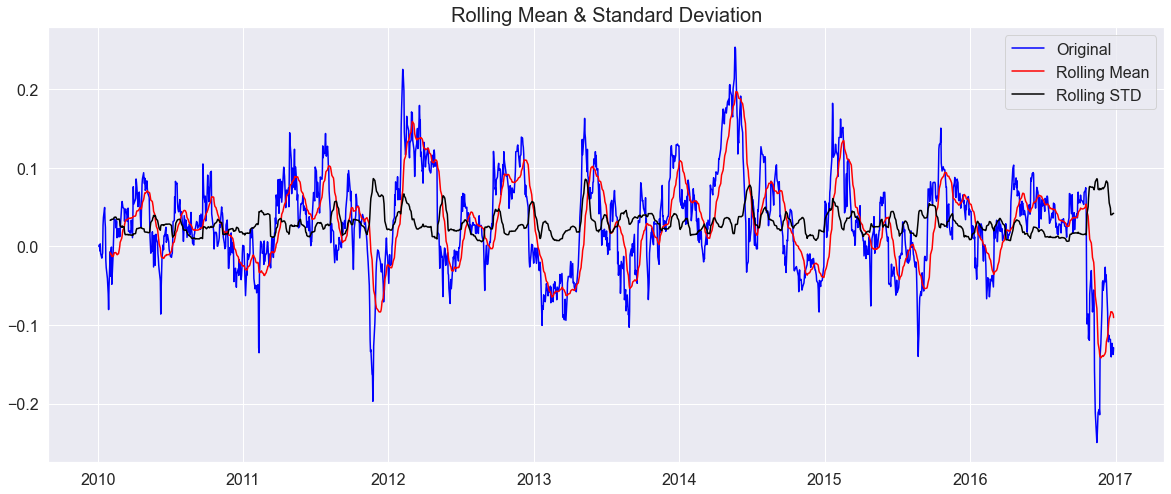

Results of Dicky-Fuller Test:
Test Statistic                -6.306610e+00
p-value                        3.311658e-08
#Lags Used                     2.000000e+00
Number of Observations Used    1.719000e+03
Critical Value (1%)           -3.434160e+00
Critical Value (5%)           -2.863223e+00
Critical Value (10%)          -2.567666e+00
dtype: float64


In [18]:
logScaleMinusExponentialDecayAverage = logScale - exponentialDecayWeightedAverage
test_stationarity(logScaleMinusExponentialDecayAverage, rolling_window=20)

#### 4. Log Differencing Previous Value

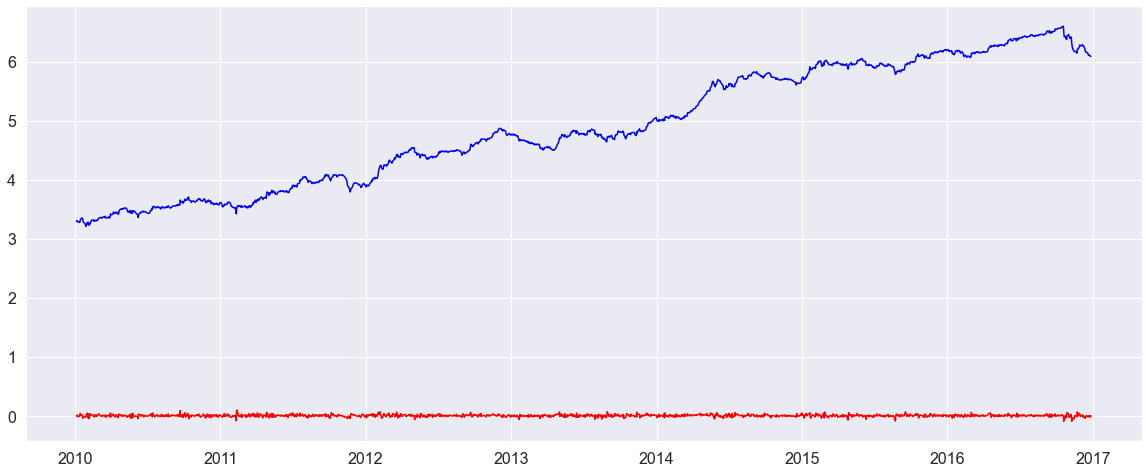

In [40]:
logDiffShifting = logScale - logScale.shift()
# plt.plot(train_df.Close, color='green')
plt.plot(logScale, color='blue')
plt.plot(logDiffShifting, color='red')
plt.show()

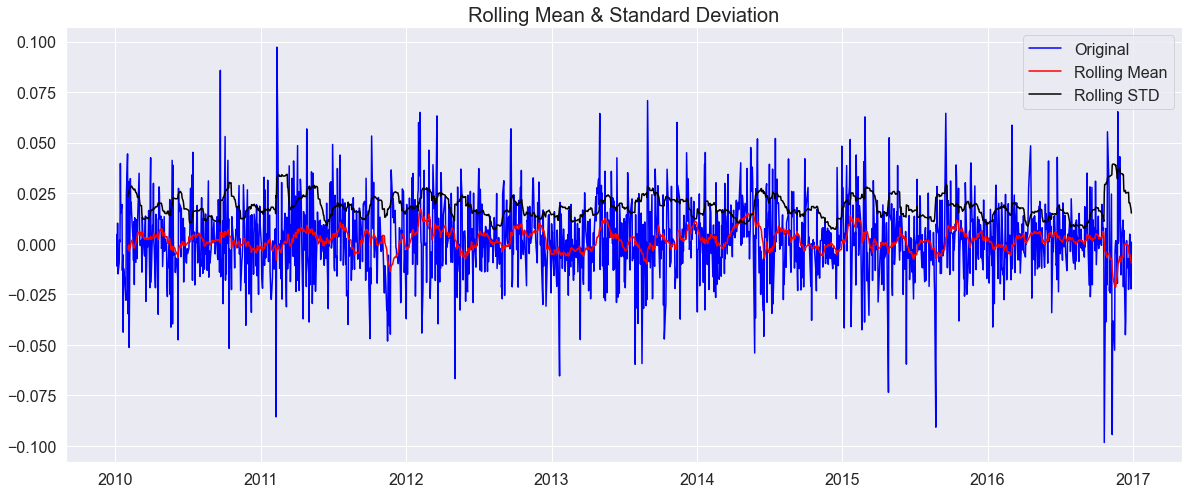

Results of Dicky-Fuller Test:
Test Statistic                  -26.829937
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1719.000000
Critical Value (1%)              -3.434160
Critical Value (5%)              -2.863223
Critical Value (10%)             -2.567666
dtype: float64


In [38]:
logDiffShifting.dropna(inplace=True)
test_stationarity(logDiffShifting, rolling_window=20)

#### Save Dickey-Fuller test results in to DataFrame

In [21]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
dftResult = pd.DataFrame(columns=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used',
                                  'Critical Value (1%)', 'Critical Value (5%)', 'Critical Value (10%)'])

In [22]:
def DickyFullerTest(df, df_test_name, print_result=True):
    dftest = adfuller(df, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    dftResult.loc[df_test_name] = dfoutput
    
    if print_result==True:
        print ('='*29)
        print ('Results of Dicky-Fuller Test:')
        print ('='*29)
        print(dfoutput)

In [23]:
DickyFullerTest(train_df.Close, 'Original Stock Close Price', print_result=False)
DickyFullerTest(simpleDiff, 'Simple Differencing (Previous Value)', print_result=False)
DickyFullerTest(logScale, 'Log Scale', print_result=False)
DickyFullerTest(logDiffShifting, 'Log Differencing (Previous Value)', print_result=False)
DickyFullerTest(logScaleMinusMovingAverage, 'Log Scale Moving Average (w=20) Differencing', print_result=False)
DickyFullerTest(logScaleMinusExponentialDecayAverage, 'Log Scale Exponential Moving Average Differencing', print_result=False)

In [24]:
dftResult

Test Statistic  \
Original Stock Close Price                              -0.773869   
Simple Differencing (Previous Value)                    -6.952118   
Log Scale                                               -1.072592   
Log Differencing (Previous Value)                      -26.829937   
Log Scale Moving Average (w=20) Differencing            -8.015372   
Log Scale Exponential Moving Average Differencing       -6.306610   

                                                        p-value  #Lags Used  \
Original Stock Close Price                         8.266777e-01        25.0   
Simple Differencing (Previous Value)               9.633017e-10        24.0   
Log Scale                                          7.258772e-01         2.0   
Log Differencing (Previous Value)                  0.000000e+00         1.0   
Log Scale Moving Average (w=20) Differencing       2.146006e-12         2.0   
Log Scale Exponential Moving Average Differencing  3.311658e-08         2.0   

                                                   Number of Observations Used  \
Original Stock Close Price                                              1696.0   
Simple Differencing (Previous Value)                                    1696.0   
Log Scale                                                               1719.0   
Log Differencing (Previous Value)                                       1719.0   
Log Scale Moving Average (w=20) Differencing                            1700.0   
Log Scale Exponential Moving Average Differencing                       1719.0   

                                                   Critical Value (1%)  \
Original Stock Close Price                                   -3.434212   
Simple Differencing (Previous Value)                         -3.434212   
Log Scale                                                    -3.434160   
Log Differencing (Previous Value)                            -3.434160   
Log Scale Moving Average (w=20) Differencing                 -3.434202   
Log Scale Exponential Moving Average Differencing            -3.434160   

                                                   Critical Value (5%)  \
Original Stock Close Price                                   -2.863246   
Simple Differencing (Previous Value)                         -2.863246   
Log Scale                                                    -2.863223   
Log Differencing (Previous Value)                            -2.863223   
Log Scale Moving Average (w=20) Differencing                 -2.863242   
Log Scale Exponential Moving Average Differencing            -2.863223   

                                                   Critical Value (10%)  
Original Stock Close Price                                    -2.567678  
Simple Differencing (Previous Value)                          -2.567678  
Log Scale                                                     -2.567666  
Log Differencing (Previous Value)                             -2.567666  
Log Scale Moving Average (w=20) Differencing                  -2.567676  
Log Scale Exponential Moving Average Differencing             -2.567666

In [25]:
dftResult[dftResult['p-value']<0.05]

Test Statistic  \
Simple Differencing (Previous Value)                    -6.952118   
Log Differencing (Previous Value)                      -26.829937   
Log Scale Moving Average (w=20) Differencing            -8.015372   
Log Scale Exponential Moving Average Differencing       -6.306610   

                                                        p-value  #Lags Used  \
Simple Differencing (Previous Value)               9.633017e-10        24.0   
Log Differencing (Previous Value)                  0.000000e+00         1.0   
Log Scale Moving Average (w=20) Differencing       2.146006e-12         2.0   
Log Scale Exponential Moving Average Differencing  3.311658e-08         2.0   

                                                   Number of Observations Used  \
Simple Differencing (Previous Value)                                    1696.0   
Log Differencing (Previous Value)                                       1719.0   
Log Scale Moving Average (w=20) Differencing                            1700.0   
Log Scale Exponential Moving Average Differencing                       1719.0   

                                                   Critical Value (1%)  \
Simple Differencing (Previous Value)                         -3.434212   
Log Differencing (Previous Value)                            -3.434160   
Log Scale Moving Average (w=20) Differencing                 -3.434202   
Log Scale Exponential Moving Average Differencing            -3.434160   

                                                   Critical Value (5%)  \
Simple Differencing (Previous Value)                         -2.863246   
Log Differencing (Previous Value)                            -2.863223   
Log Scale Moving Average (w=20) Differencing                 -2.863242   
Log Scale Exponential Moving Average Differencing            -2.863223   

                                                   Critical Value (10%)  
Simple Differencing (Previous Value)                          -2.567678  
Log Differencing (Previous Value)                             -2.567666  
Log Scale Moving Average (w=20) Differencing                  -2.567676  
Log Scale Exponential Moving Average Differencing             -2.567666

In [26]:
dftResult[dftResult['p-value']==dftResult['p-value'].min()]

Test Statistic  p-value  #Lags Used  \
Log Differencing (Previous Value)      -26.829937      0.0         1.0   

                                   Number of Observations Used  \
Log Differencing (Previous Value)                       1719.0   

                                   Critical Value (1%)  Critical Value (5%)  \
Log Differencing (Previous Value)             -3.43416            -2.863223   

                                   Critical Value (10%)  
Log Differencing (Previous Value)             -2.567666

#### 5. Seasonal Decomposition

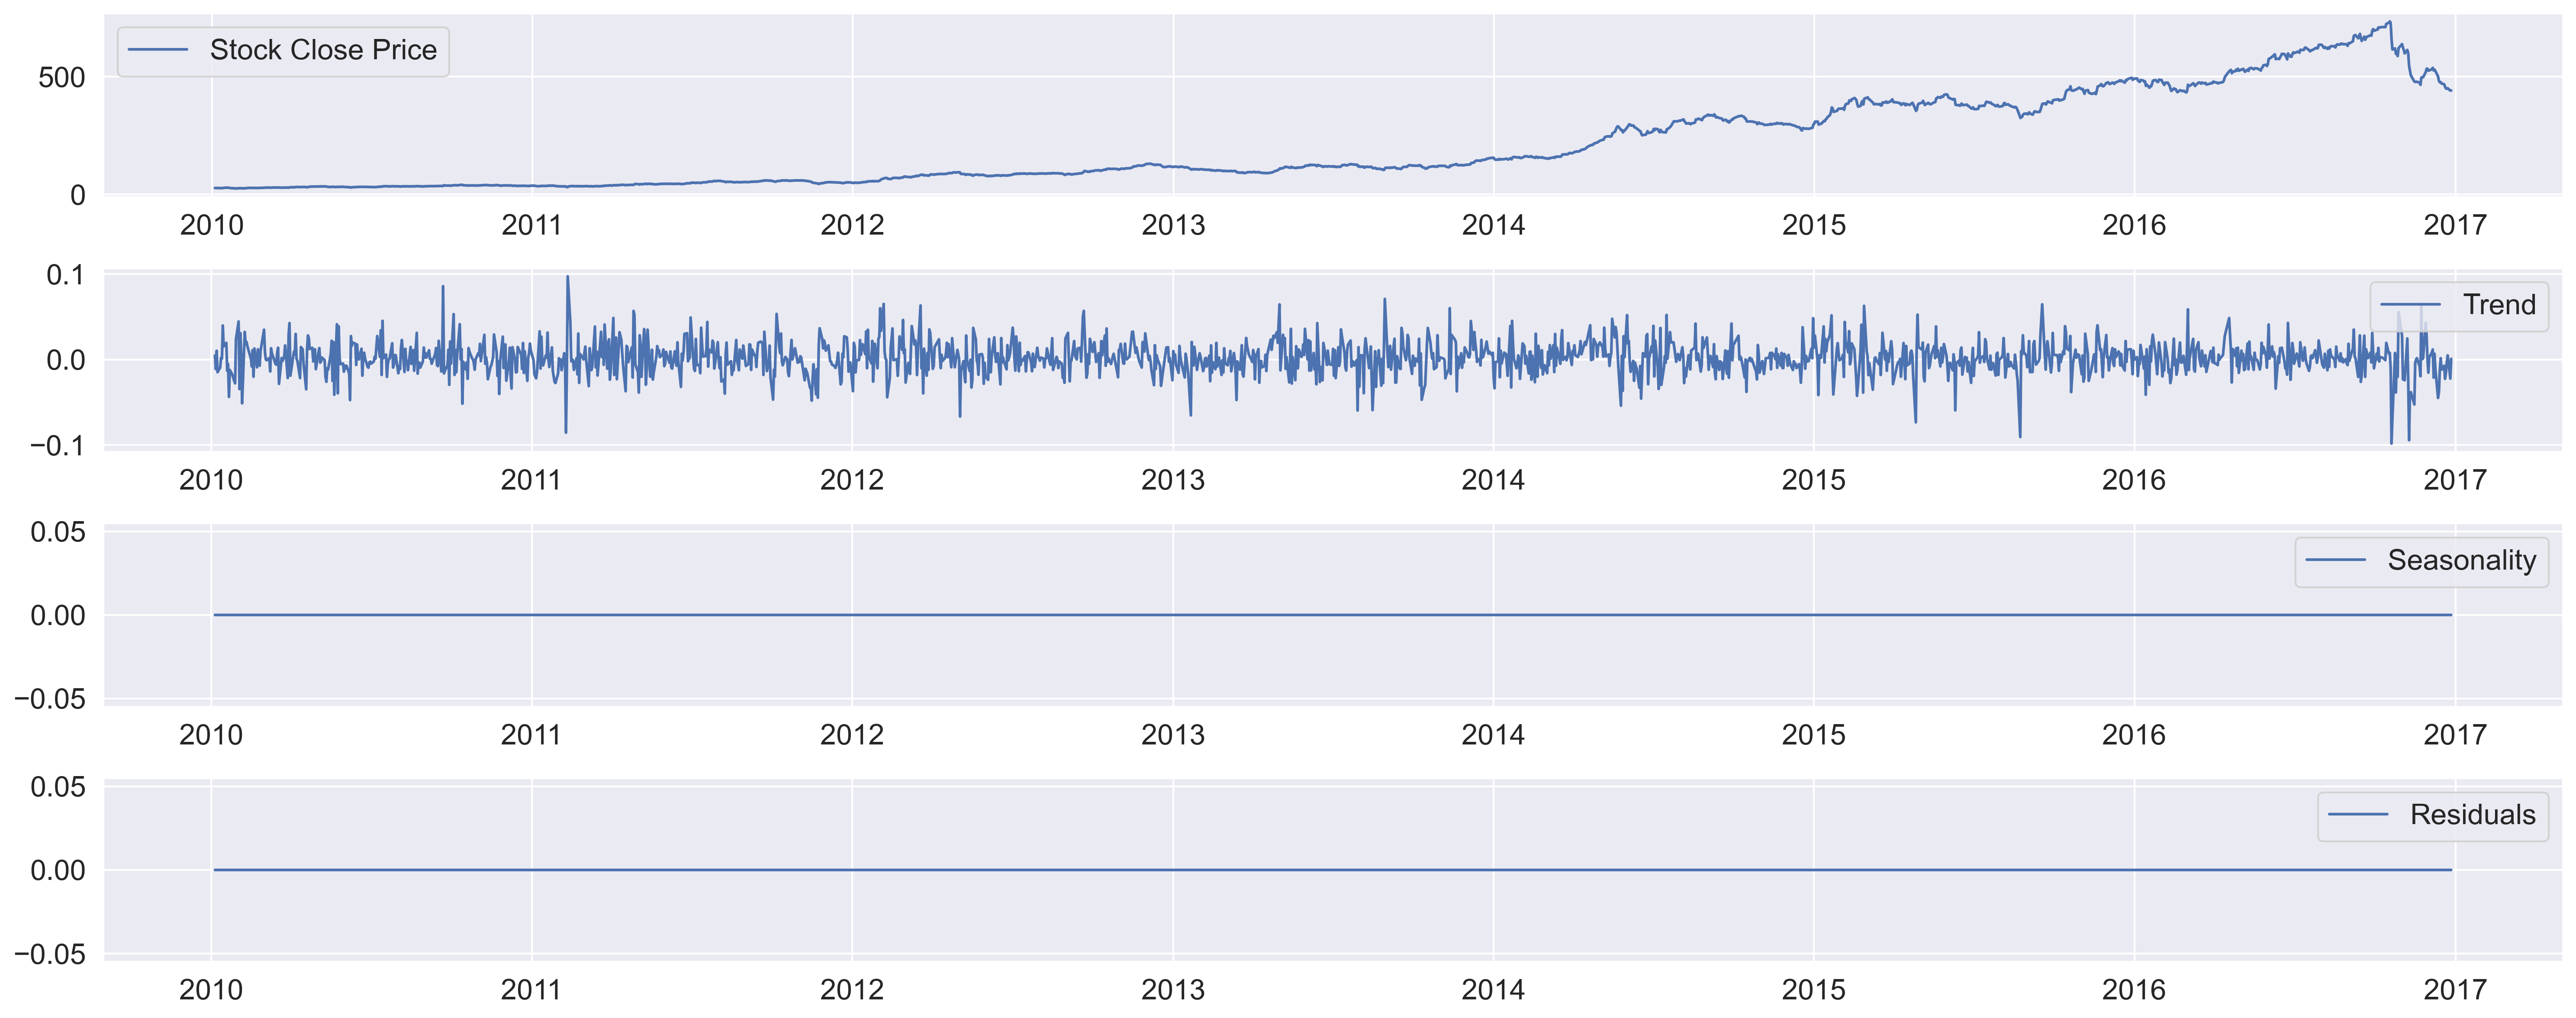

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(simpleDiff, period=1)
decomposition = seasonal_decompose(logDiffShifting, period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(20, 8), dpi=300)
plt.subplot(411)
plt.plot(train_df.Close, label = 'Stock Close Price')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')

plt.tight_layout()

In [28]:
train_df['Month'] = pd.DatetimeIndex(train_df.index).month
train_df['Year'] = pd.DatetimeIndex(train_df.index).year
train_df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04   26.049999   28.200001   26.049999   27.000000   23.964306   
2010-01-05   27.125000   28.200001   26.875000   27.125000   24.075254   
2010-01-06   27.500000   28.400000   26.625000   26.825001   23.808989   
2010-01-07   27.250000   27.549999   26.850000   27.100000   24.053064   
2010-01-08   27.250000   28.025000   26.525000   26.700001   23.698040   
...                ...         ...         ...         ...         ...   
2016-12-21  460.000000  463.000000  444.899994  449.850006  434.029785   
2016-12-22  450.000000  451.899994  444.950012  448.549988  432.775482   
2016-12-23  456.899994  456.899994  442.000000  450.700012  434.849915   
2016-12-26  456.600006  456.600006  440.000000  440.750000  425.249786   
2016-12-27  443.000000  450.000000  440.149994  441.100006  425.587494   

            Volume  Month  Year  
Date                             
2010-01-04  877408      1  2010  
2010-01-05  508398      1  2010  
2010-01-06  402216      1  2010  
2010-01-07  478980      1  2010  
2010-01-08  366642      1  2010  
...            ...    ...   ...  
2016-12-21  271401     12  2016  
2016-12-22  116969     12  2016  
2016-12-23  274159     12  2016  
2016-12-26  316586     12  2016  
2016-12-27   74677     12  2016  

[1722 rows x 8 columns]

### Yearwise Return and Volitility

In [29]:
# No of trading days
yearWiseRV = pd.DataFrame(columns=['Returns', 'Volatility'])

for year in train_df.Year.unique():
    daily_returns = train_df[train_df.Year == year].Close.pct_change()
    mean_daily_returns = daily_returns.mean()
    yearly_return = mean_daily_returns * train_df[train_df.Year == year].index.nunique()
    
    volatilities = daily_returns.std()
    volatility =   volatilities * train_df[train_df.Year == year].index.nunique()                   

    yearWiseRV.loc[year] = [yearly_return, volatility]

In [30]:
yearWiseRV

Returns  Volatility
2010  0.358543    4.641348
2011  0.360878    5.204670
2012  0.923635    4.590802
2013  0.335351    4.796033
2014  0.704771    4.421817
2015  0.540514    4.804325
2016 -0.061419    4.739440

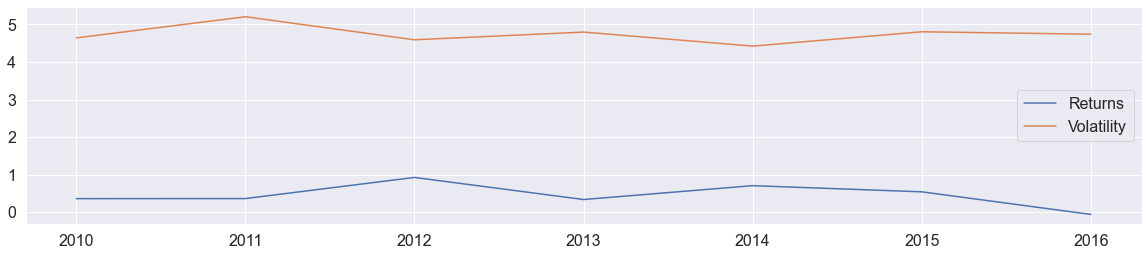

In [31]:
plt.rcParams['figure.figsize'] = (20, 4)
yearWiseRV.plot()
plt.show()

In [32]:
train_dfPivot = pd.pivot_table(train_df, values = "Close", columns = "Year", index = "Month")

In [33]:
train_dfPivot.head()

Year        2010       2011       2012        2013        2014        2015  \
Month                                                                        
1      26.815790  35.948750  52.758333  112.271739  152.161959  329.377382   
2      26.852632  34.107500  68.295000  102.563750  158.440790  386.953949   
3      28.848810  35.429545  78.729762   95.660526  162.677499  391.526193   
4      31.656250  40.081944  88.644738   94.103749  198.344737  381.901316   
5      32.382142  43.820454  83.801137  114.559092  258.267856  397.732500   

Year         2016  
Month              
1      476.528751  
2      452.985712  
3      468.206250  
4      501.640277  
5      534.020452

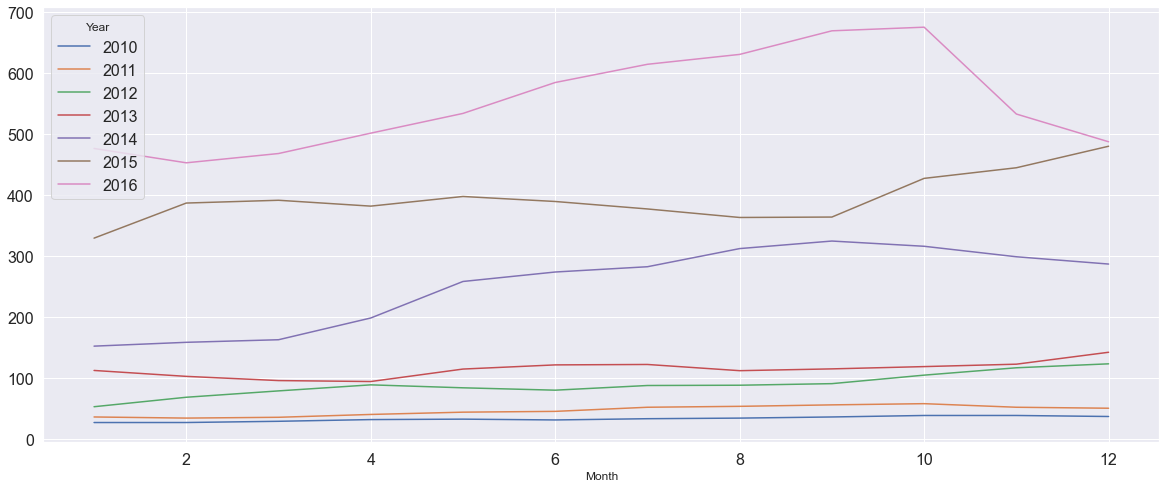

In [34]:
plt.rcParams['figure.figsize'] = (20, 8)
train_dfPivot.plot()
plt.show()

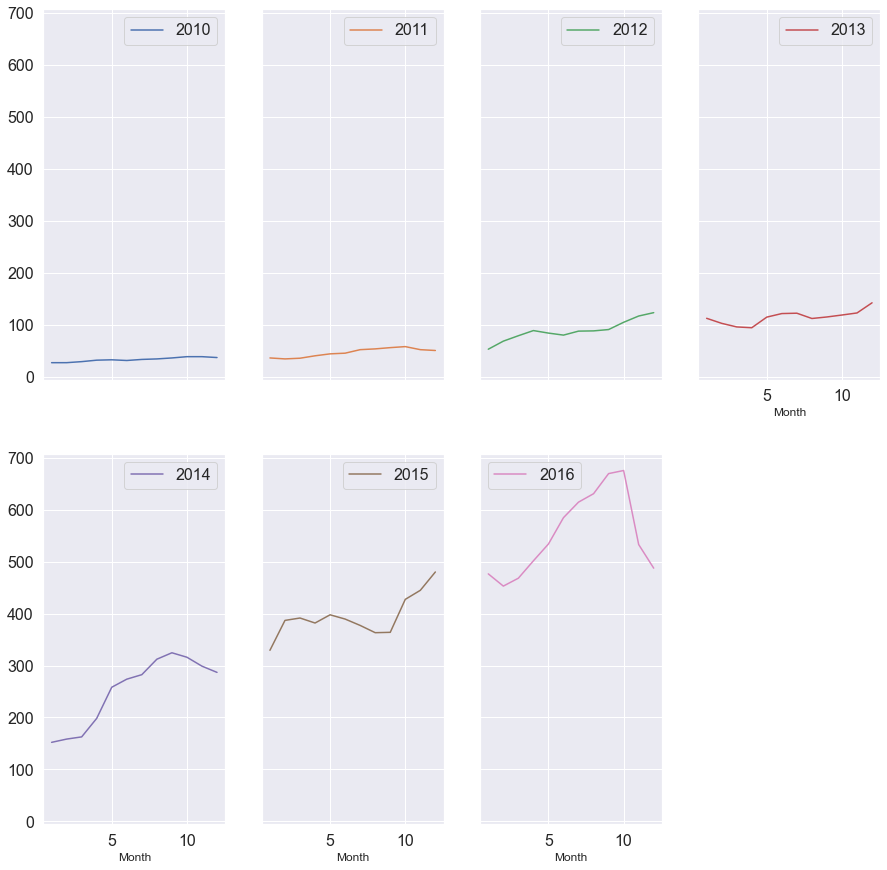

In [35]:
train_dfPivot.plot(subplots = True, figsize=(15, 15), layout=(2,4), sharey=True)
plt.show()

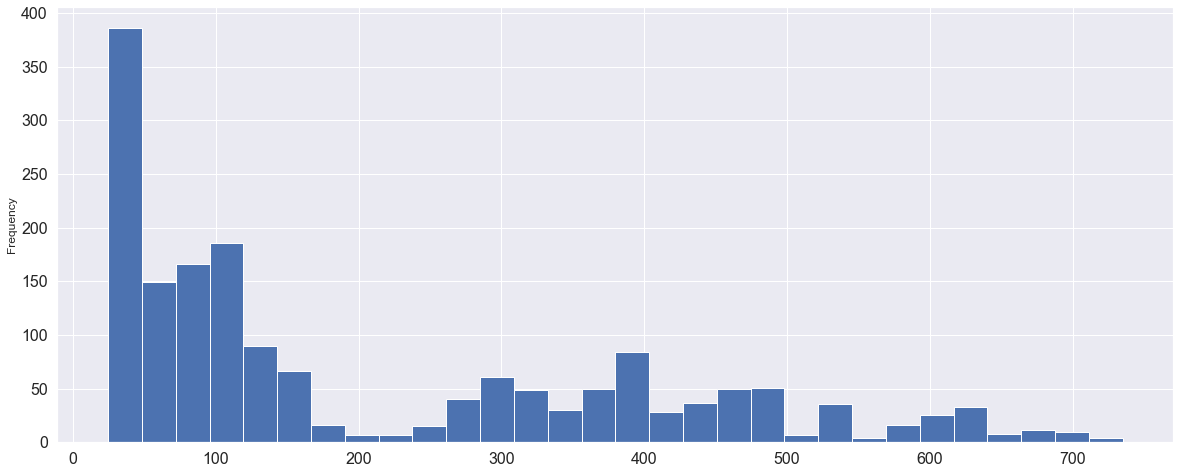

In [36]:
train_df.Close.plot(kind = "hist", bins = 30)
plt.show()